This page will give some simple exercises to be familiar with tf.

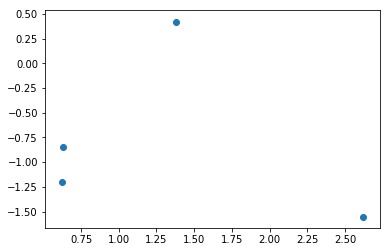

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

a = tf.random_normal([2, 4]) 
# 2 dims, 4 points, will produce 2 * 4 matrix

sess = tf.Session()
out = sess.run(a)

x, y = out
plt.scatter(x, y)
plt.show()
sess.close()








In [17]:
# This program shows the basic tf data flow 
# and generates visualization file in the tensor board 
import tensorflow as tf

a = tf.constant(4, name = "input_a")
b = tf.constant(9, name = "input_b")

c = tf.multiply(a, b, name = "mul_c")
d = tf.add(a, b, name = "add_d")

e = tf.add(c, d, name = "add_e")


with tf.Session() as sess: # session（会话）is used to control the calculation of tf data flow.
    result = sess.run(e)
    print(result)
    writer = tf.summary.FileWriter("./my_graph/1")
    writer.add_graph(sess.graph)
# D:\tf_examples\tf_exercises>tensorboard --logdir=./my_graph/1
# TensorBoard 1.13.1 at http://DESKTOP-9JK7JN0:6006 (Press CTRL+C to quit)

49


In [20]:
# This program shows the conversion among tf types and normal data types
import tensorflow as tf
import numpy as np

A = [1, 3, 5]
B = np.array([3, 4, 6])

#C = tf.convert_to_tensor(A)
#D = tf.convert_to_tensor(B)

#E = tf.add(C, D)
E = tf.add(A, B)



with tf.Session() as sess:
    print(type(A))
    print(type(B))
 #   print(type(C))
 #   print(type(D))
    F = sess.run(E)
    print(E)
    print(F) # sess.run() will return a numpy array type.




<class 'list'>
<class 'numpy.ndarray'>
Tensor("Add_6:0", shape=(3,), dtype=int32)
[ 4  7 11]


In [24]:
# placeholder usage
import tensorflow as tf


a = tf.placeholder(tf.float32, name = "input_a")
b = tf.placeholder(tf.float32, name = "input_b")

output = tf.multiply(a, b, name = "mul_out")

input_dict = {a:7.0, b:10.2}

with tf.Session() as sess:
    result = sess.run(output, feed_dict = input_dict)
    print(result)


71.4


In [25]:
# variable usage: variables like global variables in C, can be stored and invoked outside.
import tensorflow as tf

my_state = tf.Variable(0, name = "state")
one = tf.constant(1)
new_value = tf.add(my_state, one)
update = tf.assign(my_state, new_value)

init_Op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_Op)
    print(sess.run(my_state))

    for i in range(3):
        sess.run(update)
        print(sess.run(my_state))


0
1
2
3


In [10]:
# reduce(约减).A = [[[1, 1, 1],[2, 2, 2]], [[3, 3, 3], [4, 4, 4]]]
# axis = 0: 第一个括号里面的元素相加：[[1, 1, 1],[2, 2, 2]] + [[3, 3, 3], [4, 4, 4]] 
# axis = 1: 第二个括号里面的元素相加：[1, 1, 1] + [2, 2, 2]], [3, 3, 3] + [4, 4, 4]
# axis = 2: 第三个括号里面的元素相加： 1+1+1， 2+2+2， 3+3+3， 4+4+4
# final dimension will reduce 1
import tensorflow as tf

#A = tf.constant([[[1, 1, 1],[2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
A = tf.constant([[[[1, 2], [1, 3], [1, 4]], [[4, 2], [1, 3], [1, 4]]],[[[1, 2], [1, 3], [1, 4]],[[1, 2], [1, 3], [1, 4]]]])

A0 = tf.reduce_sum(A, axis = 0)
A1 = tf.reduce_sum(A, axis = 1)
A2 = tf.reduce_sum(A, axis = 2)
B0 = tf.pow(3, 4) # 3 ^ 4

with tf.Session() as sess:
    A0 = sess.run(A0)
    print(A0)
    print("#############")
    A1 = sess.run(A1)
    print(A1)
    print("#############")
    A2 = sess.run(A2)
    print(A2)
    print("#############")
    print(sess.run(B0))


[[[2 4]
  [2 6]
  [2 8]]

 [[5 4]
  [2 6]
  [2 8]]]
#############
[[[5 4]
  [2 6]
  [2 8]]

 [[2 4]
  [2 6]
  [2 8]]]
#############
[[[3 9]
  [6 9]]

 [[3 9]
  [3 9]]]
#############
81
